# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [1]:
!ls

Juhana-Lumber.ipynb
Lumber.ipynb
lumber-prices.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("lumber-prices.csv")

In [4]:
df.head()

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [5]:
df.head(1)

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00


It is December 1996

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [6]:
df.tail(1)

,open,high,low,close,date
299,$595.20,$831.80,$530.10,$824.50,2021-11-01T00:00:00


It is November 2021

## What 3 months had the highest high lumber price?

In [7]:
df.high = df.high.str.replace("$", "")
df.high = df.high.astype(float)

C:\Users\Juhana\AppData\Local\Temp\ipykernel_13124\614808678.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.high = df.high.str.replace("$", "")


In [8]:
df.sort_values(by='high', ascending=False).head(3)

,open,high,low,close,date
293,$1520.60,1711.2,$1201.00,$1309.50,2021-05-03T00:00:00
292,$1012.60,1502.3,$1006.00,$1500.50,2021-04-01T00:00:00
294,$1315.00,1380.0,$705.00,$716.00,2021-06-01T00:00:00


The three months with highest high prices are May, April and June 2021

## What 3 months had the lowest low lumber price?

In [9]:
df.low = df.low.str.replace("$", "")
df.low = df.low.astype(float)

C:\Users\Juhana\AppData\Local\Temp\ipykernel_13124\179472617.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace("$", "")


In [10]:
df.sort_values(by='low').head(3)

,open,high,low,close,date
145,$168.70,171.8,137.9,$148.10,2009-01-02T00:00:00
146,$158.10,175.9,138.0,$147.00,2009-02-02T00:00:00
147,$144.60,179.8,138.0,$171.30,2009-03-02T00:00:00


The three months with lowest low prices are January, February and March 2009

## What is the median "high" lumber price in our dataset?

In [11]:
df.high.median()

329.65

## What is the median "low" lumber price in our dataset?

In [12]:
df.low.median()

286.1

## Plot the maximum "high" lumber price on an annual basis.

In [13]:
df.head()

,open,high,low,close,date
0,$407.00,424.7,377.0,$424.70,1996-12-09T00:00:00
1,$426.00,450.5,395.0,$411.40,1997-01-02T00:00:00
2,$408.50,421.5,382.1,$383.50,1997-02-03T00:00:00
3,$386.00,389.7,355.0,$380.50,1997-03-03T00:00:00
4,$378.00,417.5,376.5,$403.10,1997-04-01T00:00:00


In [14]:
df.date = df.date.str.replace("T00:00:00", "")


I wasn't sure whether day-of-time or hour data would have mattered, but I removed it.

In [15]:
df.head()

,open,high,low,close,date
0,$407.00,424.7,377.0,$424.70,1996-12-09
1,$426.00,450.5,395.0,$411.40,1997-01-02
2,$408.50,421.5,382.1,$383.50,1997-02-03
3,$386.00,389.7,355.0,$380.50,1997-03-03
4,$378.00,417.5,376.5,$403.10,1997-04-01


In [16]:
df['year'] = pd.DatetimeIndex(df['date']).year

Did some sleuthing and found that one can extract plain years from colums containing dates with DatatimeIndex(). So I added a column year and extracted years from dates into that column. 

In [17]:
df.head()

,open,high,low,close,date,year
0,$407.00,424.7,377.0,$424.70,1996-12-09,1996
1,$426.00,450.5,395.0,$411.40,1997-01-02,1997
2,$408.50,421.5,382.1,$383.50,1997-02-03,1997
3,$386.00,389.7,355.0,$380.50,1997-03-03,1997
4,$378.00,417.5,376.5,$403.10,1997-04-01,1997


Then I grouped by 'year', asked the max figure in 'high' column and plotted.

<AxesSubplot: xlabel='year'>

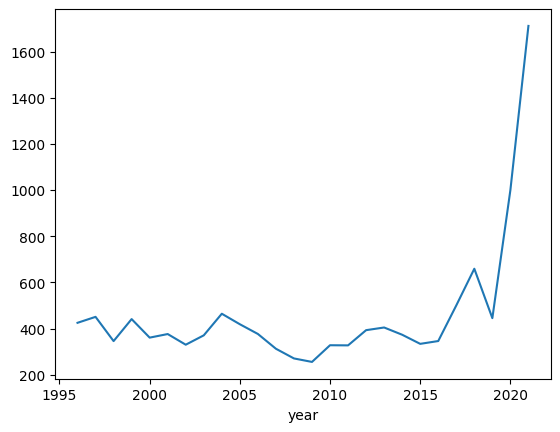

In [18]:
df.groupby('year').high.max().plot()

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='year'>

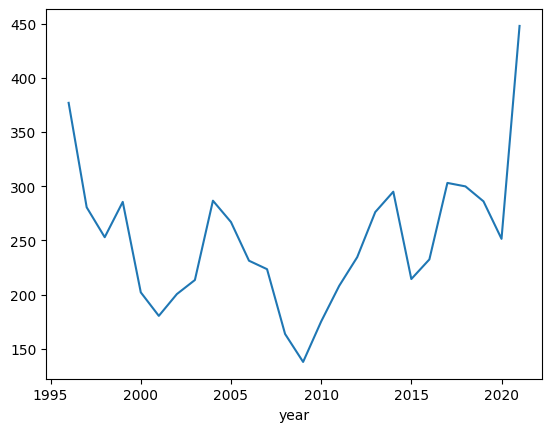

In [19]:
df.groupby('year').low.min().plot()

## Plot the median "close" lumber price on an quarterly basis.

In [20]:
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [21]:
df.close = df.close.str.replace("$", "")
df.close = df.close.astype(float)

C:\Users\Juhana\AppData\Local\Temp\ipykernel_13124\1129911477.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.close = df.close.str.replace("$", "")


<AxesSubplot: xlabel='quarter'>

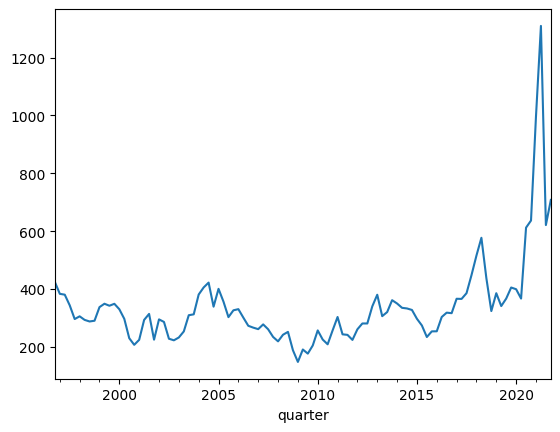

In [22]:
df.groupby('quarter').close.median().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [23]:
df['price_difference'] = df['high'] - df['low']

In [24]:
df.head()

,open,high,low,close,date,year,quarter,price_difference
0,$407.00,424.7,377.0,424.7,1996-12-09,1996,1996Q4,47.7
1,$426.00,450.5,395.0,411.4,1997-01-02,1997,1997Q1,55.5
2,$408.50,421.5,382.1,383.5,1997-02-03,1997,1997Q1,39.4
3,$386.00,389.7,355.0,380.5,1997-03-03,1997,1997Q1,34.7
4,$378.00,417.5,376.5,403.1,1997-04-01,1997,1997Q2,41.0


In [25]:
df.sort_values(by='price_difference', ascending=False).head(1)

,open,high,low,close,date,year,quarter,price_difference
294,$1315.00,1380.0,705.0,716.0,2021-06-01,2021,2021Q2,675.0


The biggest difference between high and low prices within a month was in June 2021.

## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [26]:
df.open = df.open.str.replace("$", "")
df.open = df.open.astype(float)

C:\Users\Juhana\AppData\Local\Temp\ipykernel_13124\3134079093.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.open = df.open.str.replace("$", "")


In [27]:
df.head()

,open,high,low,close,date,year,quarter,price_difference
0,407.0,424.7,377.0,424.7,1996-12-09,1996,1996Q4,47.7
1,426.0,450.5,395.0,411.4,1997-01-02,1997,1997Q1,55.5
2,408.5,421.5,382.1,383.5,1997-02-03,1997,1997Q1,39.4
3,386.0,389.7,355.0,380.5,1997-03-03,1997,1997Q1,34.7
4,378.0,417.5,376.5,403.1,1997-04-01,1997,1997Q2,41.0


In [28]:
df['close'] > df['open']

0       True
1      False
2      False
3      False
4       True
       ...  
295    False
296    False
297     True
298    False
299     True
Length: 300, dtype: bool

In [29]:
df[df['close'] > df['open']]

,open,high,low,close,date,year,quarter,price_difference
0,407.0,424.7,377.0,424.7,1996-12-09,1996,1996Q4,47.7
4,378.0,417.5,376.5,403.1,1997-04-01,1997,1997Q2,41.0
8,342.0,365.9,341.1,356.7,1997-08-01,1997,1997Q3,24.8
10,296.0,328.4,295.0,296.3,1997-10-01,1997,1997Q4,33.4
11,299.0,330.0,291.0,325.0,1997-11-03,1997,1997Q4,39.0
...,...,...,...,...,...,...,...,...
290,887.0,1030.4,842.9,995.6,2021-02-01,2021,2021Q1,187.5
291,1000.0,1045.0,826.3,1009.1,2021-03-01,2021,2021Q1,218.7
292,1012.6,1502.3,1006.0,1500.5,2021-04-01,2021,2021Q2,496.3
297,482.1,659.7,454.4,627.5,2021-09-01,2021,2021Q3,205.3


## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [30]:
(df['close'] < df['open']).value_counts()

True     155
False    145
dtype: int64

In [31]:
df[df['close'] < df['open']]

,open,high,low,close,date,year,quarter,price_difference
1,426.0,450.5,395.0,411.4,1997-01-02,1997,1997Q1,55.5
2,408.5,421.5,382.1,383.5,1997-02-03,1997,1997Q1,39.4
3,386.0,389.7,355.0,380.5,1997-03-03,1997,1997Q1,34.7
5,401.9,404.4,370.1,380.5,1997-05-01,1997,1997Q2,34.3
6,387.5,393.1,347.1,378.0,1997-06-02,1997,1997Q2,46.0
...,...,...,...,...,...,...,...,...
293,1520.6,1711.2,1201.0,1309.5,2021-05-03,2021,2021Q2,510.2
294,1315.0,1380.0,705.0,716.0,2021-06-01,2021,2021Q2,675.0
295,716.0,825.6,490.0,621.2,2021-07-01,2021,2021Q3,335.6
296,623.1,650.0,448.0,482.8,2021-08-02,2021,2021Q3,202.0


## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [84]:
y2020_df = df[df.year == 2020]
y2020_df[y2020_df['close'] > y2020_df['open']]

,open,high,low,close,date,year,quarter,price_difference
277,404.0,444.4,387.3,435.5,2020-01-02,2020,2020Q1,57.1
280,271.1,344.7,251.5,319.7,2020-04-01,2020,2020Q2,93.2
281,320.0,378.5,320.0,367.1,2020-05-01,2020,2020Q2,58.5
282,362.3,447.7,346.3,435.7,2020-06-01,2020,2020Q2,101.4
283,439.0,600.0,435.1,585.8,2020-07-01,2020,2020Q3,164.9
284,595.0,934.5,584.1,928.0,2020-08-03,2020,2020Q3,350.4
287,498.5,648.0,495.0,636.8,2020-11-02,2020,2020Q4,153.0
288,641.2,900.5,633.0,873.1,2020-12-01,2020,2020Q4,267.5


## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [32]:
y2000_df = df[df.year == 2000]
y2000_df[y2000_df['close'] > y2000_df['open']]

,open,high,low,close,date,year,quarter,price_difference
45,222.0,250.3,212.1,230.1,2000-09-01,2000,2000Q3,38.2
47,207.9,249.7,204.3,234.8,2000-11-01,2000,2000Q4,45.4
